In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as holdout
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
from sklearn.metrics import precision_score, recall_score, average_precision_score
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier as rfc
import time


In [2]:
#Importing dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


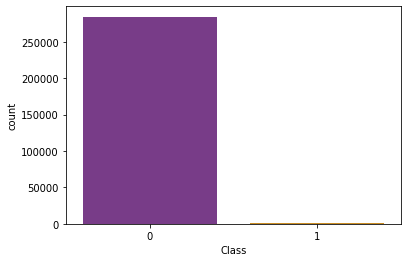

In [3]:
#Class distributation check

sns.countplot(x='Class', data=df, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))


In [4]:
#Scaling 'Time' and 'Amount' Features

rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


------------------------------------------------------------------
Transaction Number x_train dataset:  (227845, 30)
Transaction Number y_train dataset:  (227845, 1)
Transaction Number x_test dataset:  (56962, 30)
Transaction Number y_test dataset:  (56962, 1)
Before Sampling, counts of label '1': [391]
Before Sampling, counts of label '0': [227454] 

------------------------------------------------------------------
After OSSx1, the shape of train_x: (26161, 30)
After OSSx1, the shape of train_y: (26161,) 

After OSSx1, counts of label '1': 391
After OSSx1, counts of label '0': 25770 

After OSSx1, counts of label '1', %: 1.4945911853522418
After OSSx1, counts of label '0', %: 98.50540881464775
------------------------------------------------------------------
After OSSx2, the shape of train_x: (7916, 30)
After OSSx2, the shape of train_y: (7916,) 

After OSSx2, counts of label '1': 391
After OSSx2, counts of label '0': 7525 

After OSSx2, counts of label '1', %: 4.939363314805457
Aft

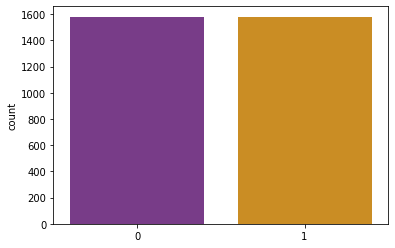

In [5]:
#Train, Test Split
x = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

#Sampling the data with OSSx4 and then SMOTE

sts= time.time()
print('------------------------------------------------------------------')
print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Sampling, counts of label '0': {} \n".format(sum(y_train==0)))
print('------------------------------------------------------------------')
undersample1 = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_train_s, y_train_s = undersample1.fit_sample(x_train, y_train.ravel())

print('After OSSx1, the shape of train_x: {}'.format(x_train_s.shape))
print('After OSSx1, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OSSx1, counts of label '1': {}".format(sum(y_train_s==1)))
print("After OSSx1, counts of label '0': {} \n".format(sum(y_train_s==0)))


print("After OSSx1, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OSSx1, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))
print('------------------------------------------------------------------')
undersample2 = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_train_s2, y_train_s2 = undersample2.fit_sample(x_train_s, y_train_s.ravel())
print('After OSSx2, the shape of train_x: {}'.format(x_train_s2.shape))
print('After OSSx2, the shape of train_y: {} \n'.format(y_train_s2.shape))

print("After OSSx2, counts of label '1': {}".format(sum(y_train_s2==1)))
print("After OSSx2, counts of label '0': {} \n".format(sum(y_train_s2==0)))


print("After OSSx2, counts of label '1', %: {}".format(sum(y_train_s2==1)/len(y_train_s2)*100.0,2))
print("After OSSx2, counts of label '0', %: {}".format(sum(y_train_s2==0)/len(y_train_s2)*100.0,2))

print('------------------------------------------------------------------')
undersample3 = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_train_s3, y_train_s3 = undersample3.fit_sample(x_train_s2, y_train_s2.ravel())
print('After OSSx3, the shape of train_x: {}'.format(x_train_s3.shape))
print('After OSSx3, the shape of train_y: {} \n'.format(y_train_s3.shape))

print("After OSSx3, counts of label '1': {}".format(sum(y_train_s3==1)))
print("After OSSx3, counts of label '0': {} \n".format(sum(y_train_s3==0)))


print("After OSSx3, counts of label '1', %: {}".format(sum(y_train_s3==1)/len(y_train_s3)*100.0,2))
print("After OSSx3, counts of label '0', %: {}".format(sum(y_train_s3==0)/len(y_train_s3)*100.0,2))

print('------------------------------------------------------------------')
undersample4 = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_train_s4, y_train_s4 = undersample4.fit_sample(x_train_s3, y_train_s3.ravel())
print('After OSSx4, the shape of train_x: {}'.format(x_train_s4.shape))
print('After OSSx4, the shape of train_y: {} \n'.format(y_train_s4.shape))

print("After OSSx4, counts of label '1': {}".format(sum(y_train_s4==1)))
print("After OSSx4, counts of label '0': {} \n".format(sum(y_train_s4==0)))


print("After OSSx4, counts of label '1', %: {}".format(sum(y_train_s4==1)/len(y_train_s4)*100.0,2))
print("After OSSx4, counts of label '0', %: {}".format(sum(y_train_s4==0)/len(y_train_s4)*100.0,2))

print('------------------------------------------------------------------')
sm = SMOTE()

x_train_ss, y_train_ss = sm.fit_sample(x_train_s4, y_train_s4.ravel())

print('After OSSx4+SMOTE, the shape of train_x: {}'.format(x_train_ss.shape))
print('After OSSx4+SMOTE, the shape of train_y: {} \n'.format(y_train_ss.shape))

print("After OSSx4+SMOTE, counts of label '1': {}".format(sum(y_train_ss==1)))
print("After OSSx4+SMOTE, counts of label '0': {} \n".format(sum(y_train_ss==0)))


print("After OSSx4+SMOTE, counts of label '1', %: {}".format(sum(y_train_ss==1)/len(y_train_ss)*100.0,2))
print("After OSSx4+SMOTE, counts of label '0', %: {}".format(sum(y_train_ss==0)/len(y_train_ss)*100.0,2))


print('------------------------------------------------------------------')

sns.countplot(x=y_train_ss, data=df, palette='CMRmap')

print('------------------------------------------------------------------')

ets=time.time()
print(f"Runtime for Sampling is {ets - sts}")


# <p style="color:blue"> Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.85      0.87       101

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Runtime of Random Forest with ensemble sampling is 8.497461080551147


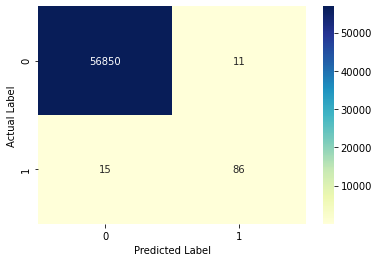

In [7]:
#Random Forest Classifier

strf = time.time()
rand_f = rfc(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train_ss, y_train_ss)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

etrf= time.time()
print(f"Runtime of Random Forest with ensemble sampling is {etrf - strf}")
